# PD3

# Czy klient odejdzie?

Podany zbiór danych przedstawia nam informacje o konkretnych klientach. Labelem do klasyfikacji jest 'Exited'.

Podany zbiór danych (w wersji przedytowanej, w porównaniu do tej, która krąży po Internecie :)) 

Kilka słów o tym jak należy pracować nad zagadnieniem:

1. Należy wyczyścić i elegancko przygotować dane. 
2. Do zagadnienia należy podejść w taki sposób aby wykonać kilka podejść do problemu zarówno z użyciem algorytmów klasyfikacji jak i klasteryzacji. W przypadku klasyfikacji zmienną celu jest określenie czy klient odejdzie. W przypadku klasteryzacji chodzi nam o ogólnie klastry klientów, ich opis oraz odniesienie do tego, czy może powstałe skupiska faktycznie odnoszą się do tych podanych jako klasa wyjściowa. 
3. Proszę pamiętać o wizualizacjach i opisywaniu czynności. 
4. Jeśli chcecie umieszczać obrazki to można je konwertować na Base64 
(https://stackoverflow.com/questions/55562088/open-base64-string-image-in-jupyter-notebook-without-saving)

Nazwy zmiennych są wytłumaczalne. 



**Po 2 algorytmy z każdego rodzaju uczenia wystarczą. Najważniejsze są wnioski i interpretacja metryk. Nie ma konieczności robienia bardzo długiej pracy :)**



Termin 2.07.2024

![CatexperimentUrl](https://t3.ftcdn.net/jpg/02/08/38/52/360_F_208385214_9fdxiqpl87cv11H4KtABl5wjJt70NG5M.jpg)


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Wczytanie danych 

In [2]:
df = pd.read_excel('Customer-Churn-Records.xlsx')
df.head()

,RowNumber,CustomerId,Surname,Score,Geography,Gender,Age,Balance,NumOfProducts,Complain,Satisfaction Score,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,0.00,1,1,2,1
1,2,15647311,Hill,608,Spain,Female,41.0,83807.86,1,1,3,0
2,3,15619304,Onio,502,France,Female,42.0,159660.80,3,1,3,1
3,4,15701354,Boni,699,France,Female,39.0,0.00,2,0,5,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,125510.82,1,0,5,0


In [3]:
from skimpy import skim 
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_nam ┃    ┃      ┃          ┃        ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ e          ┃ NA ┃ NA % ┃ mean     ┃ sd     ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ RowNumber  │  0 │    0 │     5000 │   2887 │        1 │     2501 │     5000 │     7500 │    10000 │ ▇▇▇▇▇▇ │  │
│ │ CustomerId │  0 │    0 │ 15690000 │  71940 │ 15570000 │ 15630000 │ 15690000 │ 15750000 │ 15820000 │ ▇▇▇▇▇▇ │  │
│ │ Score      │  0 │    0 │    650.5 │  96.65 │      350 │      584 │      652 │      718 │      850 │  ▂▅▇▆▃ │  │
│ │ Age        │ 20 │  0.2 │    38.93 │  10.48 │       18 │       32 │       37 │       44 │       92 │  ▃▇▃▁  │  │
│ │ Balance    │ 13 │ 0.13 │    76480 │  62400 │        0 │        0 │    97210 │   127600 │   250900 │ ▇▂▆▅▁  │  │
│ │ NumOfProdu │  0 │    0 │     1.53 │ 0.5817 │        1 │        1 │        1 │        2 │        4 │  ▇ ▇   │  │
│ │ cts        │    │      │          │        │          │          │          │          │          │        │  │
│ │ Complain   │  0 │    0 │   0.2044 │ 0.4033 │        0 │        0 │        0 │        0 │        1 │ ▇    ▂ │  │
│ │ Satisfacti │  0 │    0 │    3.014 │  1.406 │        1 │        2 │        3 │        4 │        5 │ ▇▇ ▇▇▇ │  │
│ │ on Score   │    │      │          │        │          │          │          │          │          │        │  │
│ │ Exited     │  0 │    0 │   0.2038 │ 0.4028 │        0 │        0 │        0 │        0 │        1 │ ▇    ▂ │  │
│ └────────────┴────┴──────┴──────────┴────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Surname                   │       0 │          0 │                            1 │                    10055 │  │
│ │ Geography                 │       0 │          0 │                            1 │                    10000 │  │
│ │ Gender                    │       0 │          0 │                            1 │                    10000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── 

c:\Users\kamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kamil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

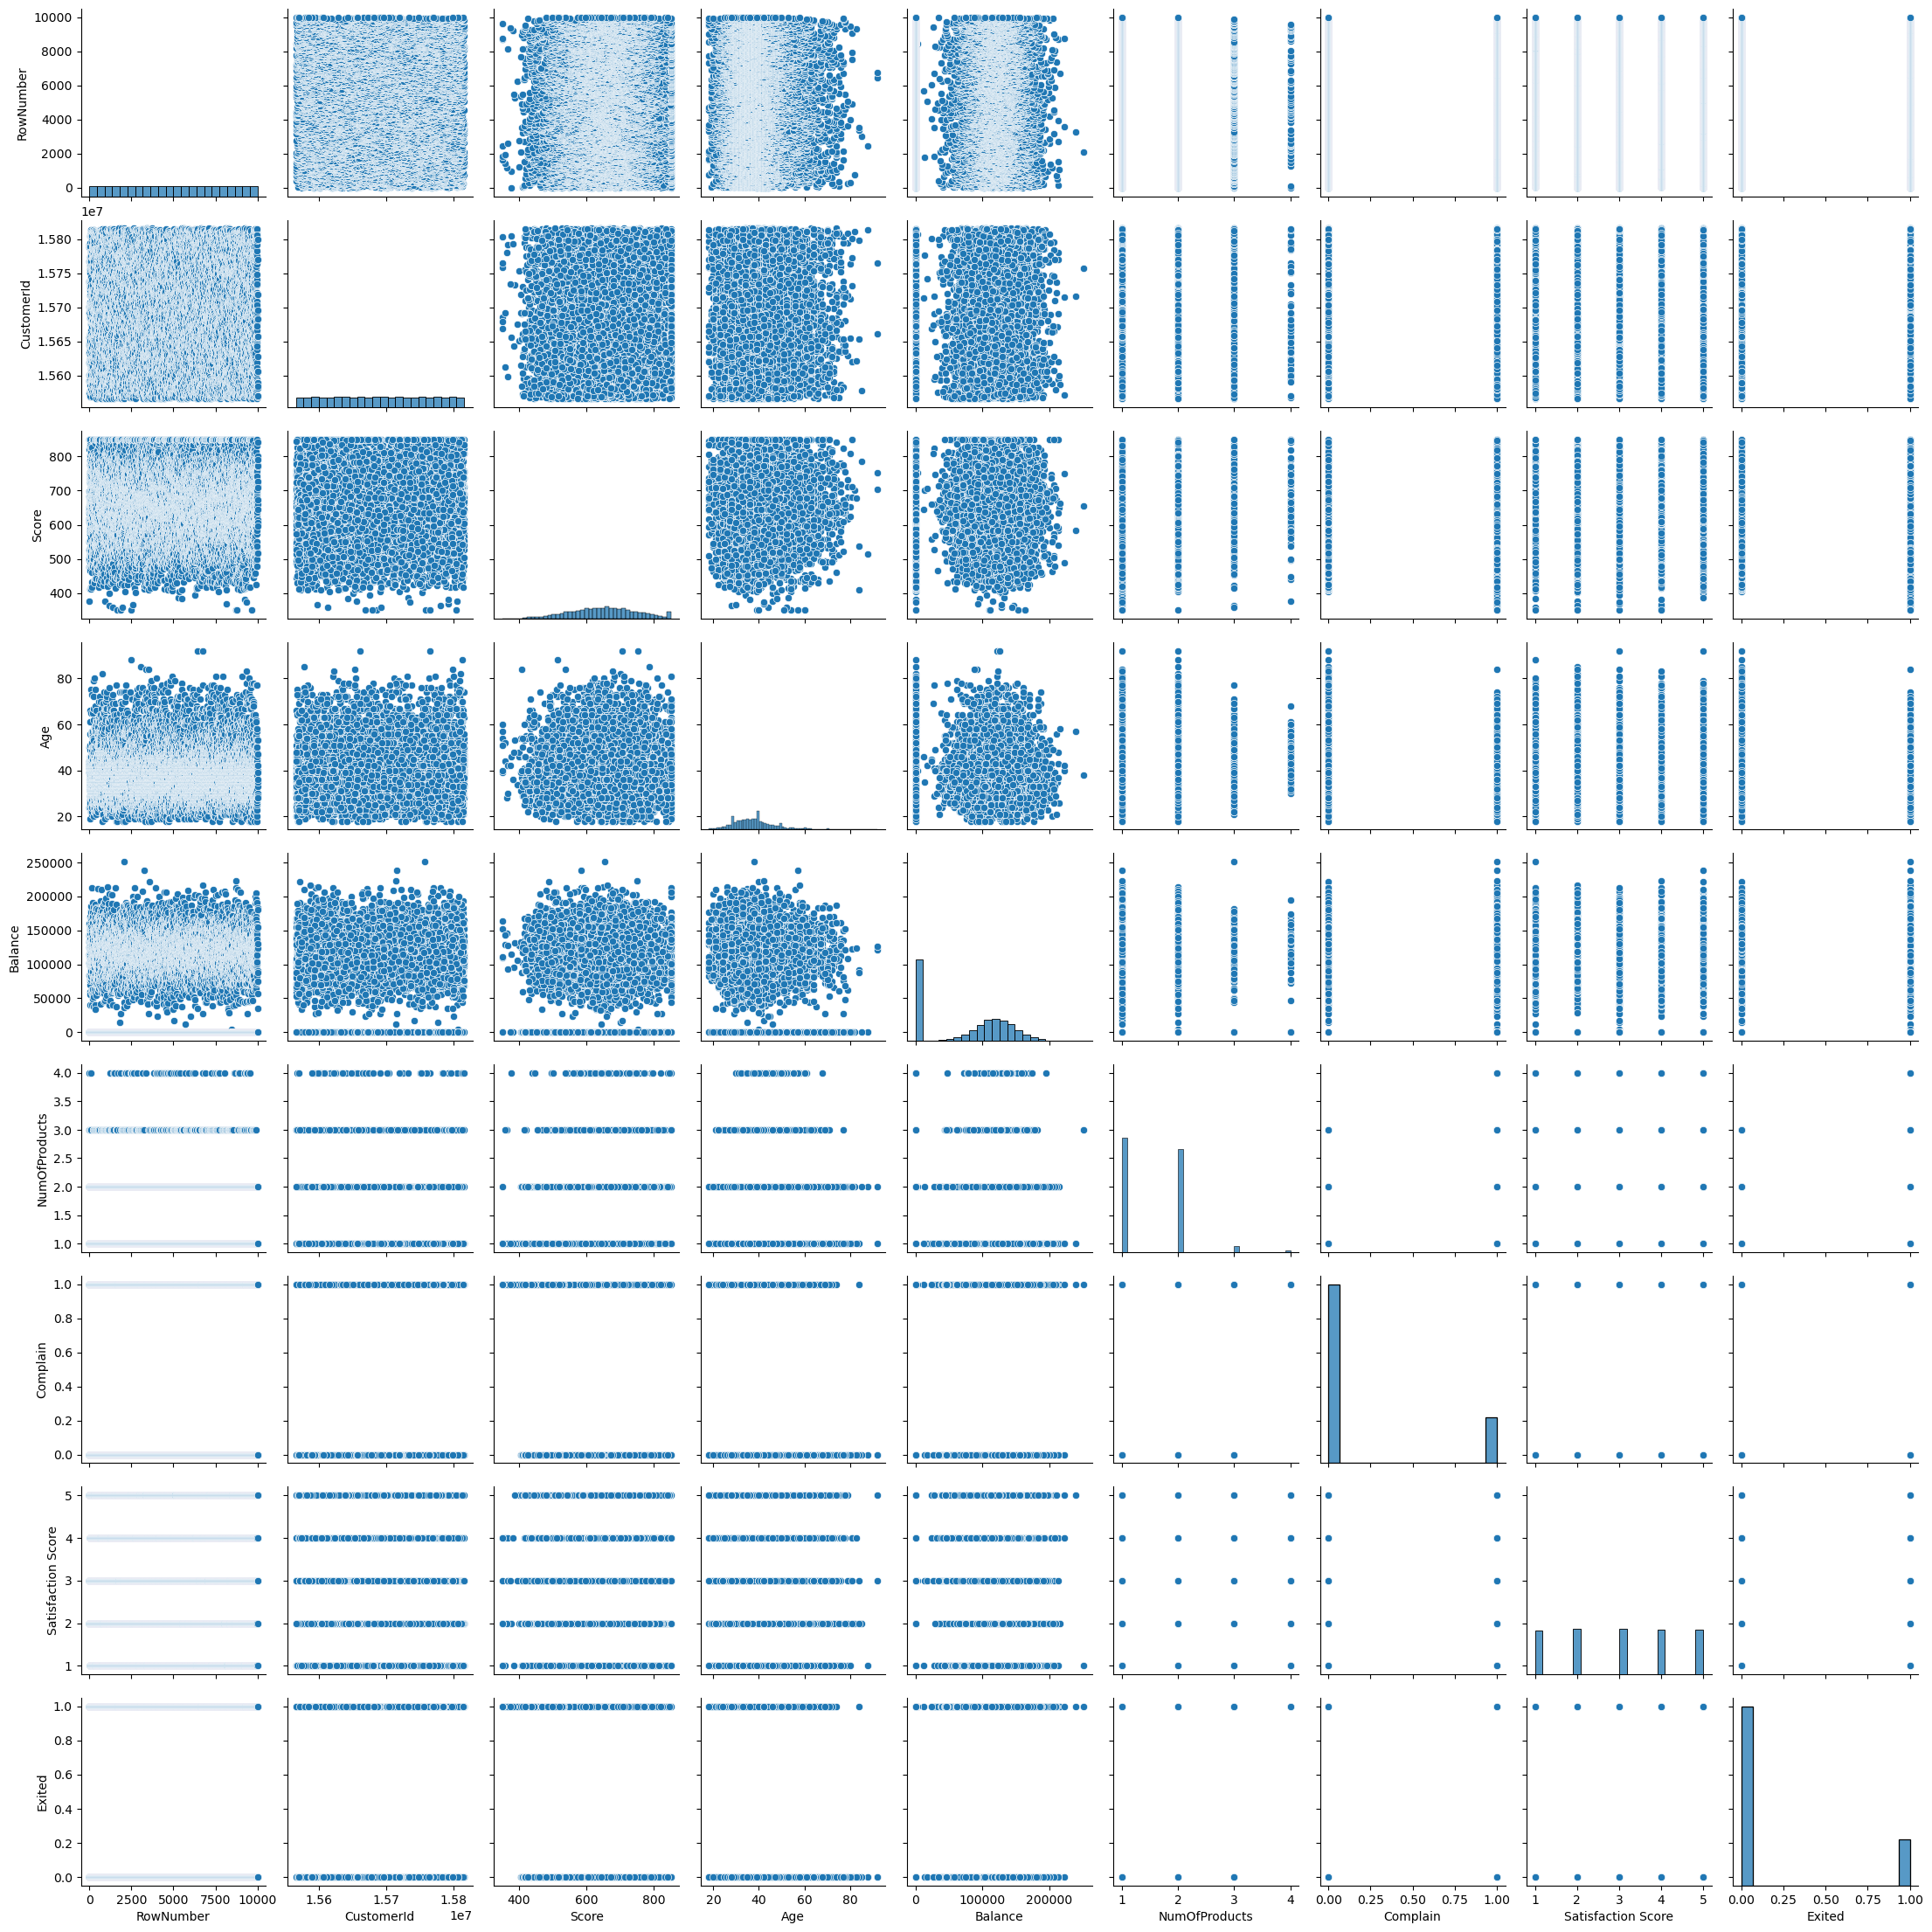

In [4]:
sns.pairplot(df)
plt.show()

### W kolumnie Age i Balance brakuje wartości. Wartość z kolumny Age uzupełniam medianą z Age natomiast Balance uzupełnię średnią.

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
df['Balance'] = df['Balance'].fillna(df['Balance'].mean()).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   Score               10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int32  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Exited              10000 non-null  int64  
dtypes: float64(1), int32(1), int64(7), object(3)
memory usage: 898.6+ KB


### Sprawdzenie duplikatów

In [6]:
def check_for_duplicates(df):
    # Returns info about duplicated values
    duplicated = df.duplicated()
    if True in duplicated:
        print('The dataframe does have duplicate values!')
    else: print("The dataframe doesn't have duplicate values!")
    return duplicated

check_for_duplicates(df)

The dataframe doesn't have duplicate values!


0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [8]:
from skimpy import skim 
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0   ┃ p25  ┃ p50    ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Score                 │   0 │     0 │   650.5 │   96.65 │  350 │  584 │    652 │     718 │    850 │  ▂▅▇▆▃ │  │
│ │ Age                   │   0 │     0 │   38.92 │   10.47 │   18 │   32 │     37 │      44 │     92 │  ▃▇▃▁  │  │
│ │ Balance               │   0 │     0 │   76480 │   62360 │    0 │    0 │  97060 │  127600 │ 250900 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts         │   0 │     0 │    1.53 │  0.5817 │    1 │    1 │      1 │       2 │      4 │  ▇ ▇   │  │
│ │ Complain              │   0 │     0 │  0.2044 │  0.4033 │    0 │    0 │      0 │       0 │      1 │ ▇    ▂ │  │
│ │ Satisfaction Score    │   0 │     0 │   3.014 │   1.406 │    1 │    2 │      3 │       4 │      5 │ ▇▇ ▇▇▇ │  │
│ │ Exited                │   0 │     0 │  0.2038 │  0.4028 │    0 │    0 │      0 │       0 │      1 │ ▇    ▂ │  │
│ └───────────────────────┴─────┴───────┴─────────┴─────────┴──────┴──────┴────────┴─────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Geography                 │       0 │          0 │                            1 │                    10000 │  │
│ │ Gender                    │       0 │          0 │                            1 │                    10000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Przekształcenie kolumn z danymi kategorycznymi

In [9]:
gender = {'Female': 1,'Male': 0 }
df.replace({'Gender': gender}, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Geography'] = label_enc.fit_transform(df['Geography'])

In [11]:
df

,Score,Geography,Gender,Age,Balance,NumOfProducts,Complain,Satisfaction Score,Exited
0,619,0,1,42,0.00,1,1,2,1
1,608,2,1,41,83807.86,1,1,3,0
2,502,0,1,42,159660.80,3,1,3,1
3,699,0,1,39,0.00,2,0,5,0
4,850,2,1,43,125510.82,1,0,5,0
...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,0.00,2,0,1,0
9996,516,0,0,35,57369.61,1,0,5,0
9997,709,0,1,36,0.00,1,1,3,1
9998,772,1,0,42,75075.31,2,1,2,1


### Klasyfikacja - podział danych na testowe i treningowe

Regresja logistyczna - dane etykietujące przyjmują 2 wartości

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix, RocCurveDisplay,ConfusionMatrixDisplay

In [13]:
train_x, test_x, train_y, test_y = train_test_split(df.drop('Exited',axis=1),df['Exited'], test_size=0.2, random_state=42)

In [14]:
logistic_model = LogisticRegression(max_iter=1000,random_state=42).fit(train_x, train_y)

#train
pred_train = cross_val_predict(logistic_model, train_x, train_y, cv=3)
print('accuracy_score',accuracy_score(train_y,pred_train))
print(confusion_matrix(train_y,pred_train))
print('f1_score:',f1_score(train_y,pred_train))
print('precision_score:',precision_score(train_y,pred_train))
print('recall_score:',recall_score(train_y,pred_train))
print(classification_report(train_y,pred_train))
print(100*'=')
#test
pred_test = cross_val_predict(logistic_model, test_x, test_y, cv=3)
print('accuracy_score',accuracy_score(test_y,pred_test))
print(confusion_matrix(test_y,pred_test))
print('f1_score:',f1_score(test_y,pred_test))
print('precision_score:',precision_score(test_y,pred_test))
print('recall_score:',recall_score(test_y,pred_test))
print(classification_report(test_y,pred_test))

accuracy_score 0.8595
[[6307   48]
 [1076  569]]
f1_score: 0.5030946065428824
precision_score: 0.9222042139384117
recall_score: 0.3458966565349544
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      6355
           1       0.92      0.35      0.50      1645

    accuracy                           0.86      8000
   macro avg       0.89      0.67      0.71      8000
weighted avg       0.87      0.86      0.83      8000

accuracy_score 0.9355
[[1599    8]
 [ 121  272]]
f1_score: 0.8083209509658246
precision_score: 0.9714285714285714
recall_score: 0.6921119592875318
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1607
           1       0.97      0.69      0.81       393

    accuracy                           0.94      2000
   macro avg       0.95      0.84      0.88      2000
weighted avg       0.94      0.94      0.93      2000



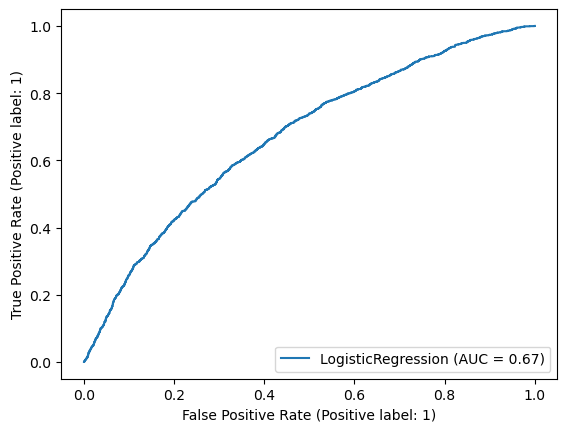

In [15]:
RocCurveDisplay.from_estimator(logistic_model,train_x, train_y)

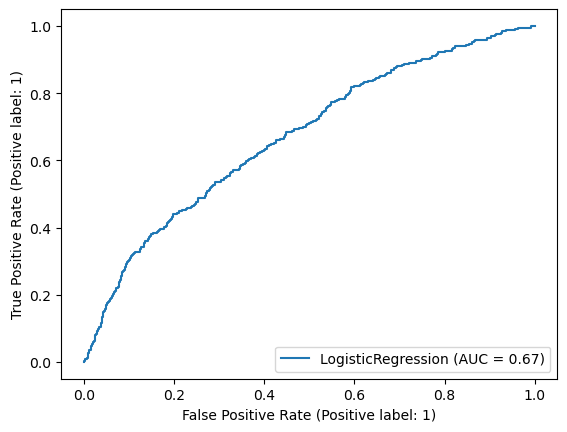

In [16]:
RocCurveDisplay.from_estimator(logistic_model,test_x, test_y)

Patrząc na wartość AUC, czyli area under curve nie otrzymano zbyt dobrego klasyfikatora - można powiedzieć, że bliżej mu do losowego niż dokładnego

Klasyfikator RandomForest

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[2,5,10],
              'max_depth':[None,3,5],
              'max_leaf_nodes':[None,2,5,10],
              'n_jobs':[-1,2,4]
             }

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, verbose=1) # verbose - opis wyświetlany ile mu to zajęło, co dopasował itd.
grid_search.fit(train_x, train_y)

best_param_no = grid_search.best_index_
print('Best params set:', grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Best params score:', grid_search.best_score_ )


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params set: {'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 5, 'n_jobs': 2} (no. 4)
Best params score: 0.9985000000000002


In [18]:
forest_clf = RandomForestClassifier(n_estimators=10,max_depth=None,max_leaf_nodes=None,n_jobs=-1,random_state=42)
forest_clf.fit(train_x,train_y)

print(accuracy_score(train_y, forest_clf.predict(train_x)))
print(accuracy_score(test_y, forest_clf.predict(test_x)))


0.999625
0.999


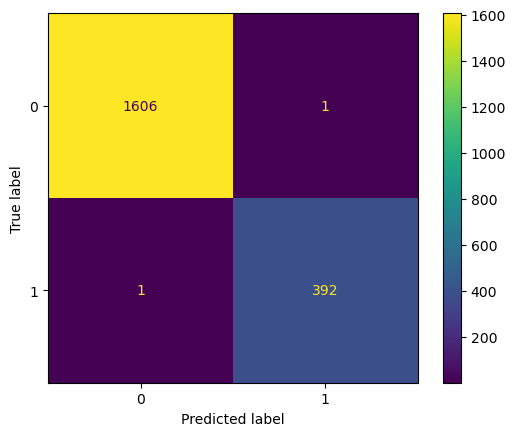

In [19]:
cm = confusion_matrix(test_y,forest_clf.predict(test_x), labels = forest_clf.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_clf.classes_ )
disp.plot()

In [20]:
print(classification_report(train_y,forest_clf.predict(train_x)))
print(classification_report(test_y,forest_clf.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6355
           1       1.00      1.00      1.00      1645

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Z metryk wynika, że otrzymano niemal idealny klasyfikator, natomiast zbiór danych, na których operuję jest stosunkowo mały, co może prowadzić do przekłamań. Należałoby skompletować więcej danych treningowych

### Klasteryzacja

In [21]:
df = df.drop(columns=['Exited'])
df

,Score,Geography,Gender,Age,Balance,NumOfProducts,Complain,Satisfaction Score
0,619,0,1,42,0.00,1,1,2
1,608,2,1,41,83807.86,1,1,3
2,502,0,1,42,159660.80,3,1,3
3,699,0,1,39,0.00,2,0,5
4,850,2,1,43,125510.82,1,0,5
...,...,...,...,...,...,...,...,...
9995,771,0,0,39,0.00,2,0,1
9996,516,0,0,35,57369.61,1,0,5
9997,709,0,1,36,0.00,1,1,3
9998,772,1,0,42,75075.31,2,1,2


Teoretycznie powinnam wziąć wszystkie kolumny pod uwagę, bo każda z nich ma jakiś wpływ na to czy klient odejdzie czy zostanie, ale z uwagi na trudności w późniejszej wizualizacji wyników na wykresie ograniczę się do 3 zmiennych:
* Balance
* Complain
* Satisfaction Score

In [22]:
clients = df.drop(columns=['Score','Geography','Gender','Age','NumOfProducts'])

Skalowanie danych


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(clients)

In [24]:
X

array([[-1.22647351,  1.97290849, -0.72113042],
       [ 0.11756207,  1.97290849, -0.00981614],
       [ 1.33402376,  1.97290849, -0.00981614],
       ...,
       [-1.22647351,  1.97290849, -0.00981614],
       [-0.02248276,  1.97290849, -0.72113042],
       [ 0.86064029, -0.50686588, -0.00981614]])

## KMEANS

### Ocena liczby klastrów dla tego zbioru danych

Z wykresu dla algorytmu KMeans wynika, że sugerowana liczba klastrów wynosi około 4 i na takiej wartości będę dalej pracować

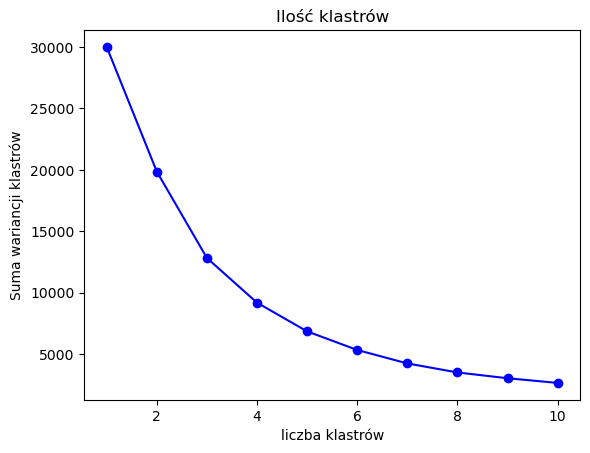

In [25]:
from sklearn.cluster import KMeans
init_vec = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=42)
    kmeans.fit(X)
    init_vec.append(kmeans.inertia_)
plt.plot(range(1, 11), init_vec,'bo-')
plt.title('Ilość klastrów')
plt.xlabel('liczba klastrów')
plt.ylabel('Suma wariancji klastrów')
plt.show()

In [49]:
# inicjalizacja algorytmu KMEANS dla 4 klastrów

kmeans_model = KMeans(n_init=10, init='k-means++', n_clusters=4, max_iter=1000, random_state=42)
kmeans_model.fit_predict(X)

array([2, 2, 2, ..., 2, 2, 3])

In [50]:
# Create data arrays
cluster_centers = kmeans_model.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[ 9.90350962e-01, -3.97619444e-01,  1.91283598e+00,
         6.88310986e-01, -5.06865881e-01,  1.06912717e+00],
       [-7.00511239e-01, -3.97619444e-01, -4.46127712e-03,
        -1.20567839e+00, -5.06865881e-01, -4.47125831e-03],
       [ 2.64511430e-01,  6.19156268e+00, -9.42345427e-03,
         2.34685826e-01,  1.97290849e+00, -9.46813594e-03],
       [ 1.05718574e+00, -3.97619444e-01, -5.11961768e-01,
         7.21338901e-01, -5.06865881e-01, -7.17361531e-01]])

In [54]:
kmeans_model.labels_

array([2, 2, 2, ..., 2, 2, 3])

In [55]:
points = np.append(points, [[0], [1], [2], [3]], axis=1)
clients["clusters"] = kmeans_model.labels_

In [57]:
clients

,Balance,Complain,Satisfaction Score,clusters
0,0.00,1,2,2
1,83807.86,1,3,2
2,159660.80,1,3,2
3,0.00,0,5,1
4,125510.82,0,5,0
...,...,...,...,...
9995,0.00,0,1,1
9996,57369.61,0,5,0
9997,0.00,1,3,2
9998,75075.31,1,2,2


In [59]:
import plotly.express as px

# wizualizacja klastrów

figure = px.scatter_3d(clients,
                    color="clusters",
                    x="Balance",
                    y="Complain",
                    z="Satisfaction Score",
                    category_orders = {"clusters": ["0", "1", "2", "3"]}
                    )
figure.update_layout()
figure.show()

## Agglomerative Clustering

sprawdzanie silhouette_score dla ilości metod i linkeage w spodziewanym zakresie (2,4) - najlepszy wynik uzyskano dla ward z liczbą klastrów 4, czyli podobnie jak w KMeans

{'ward'} 

0.4336180886942132


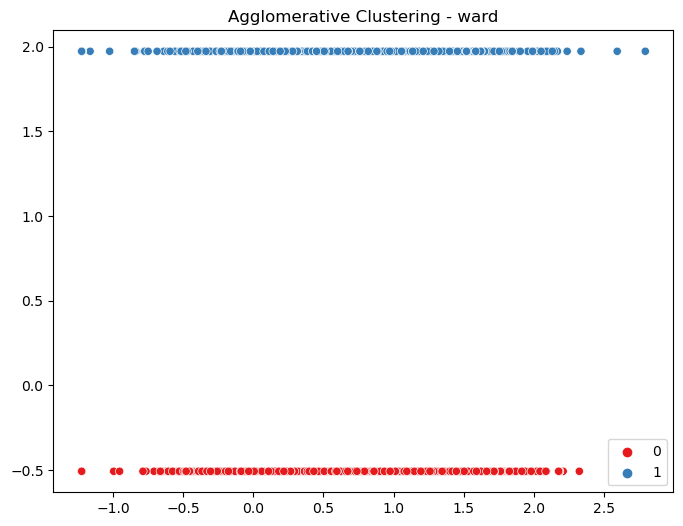

0.43928677901873053


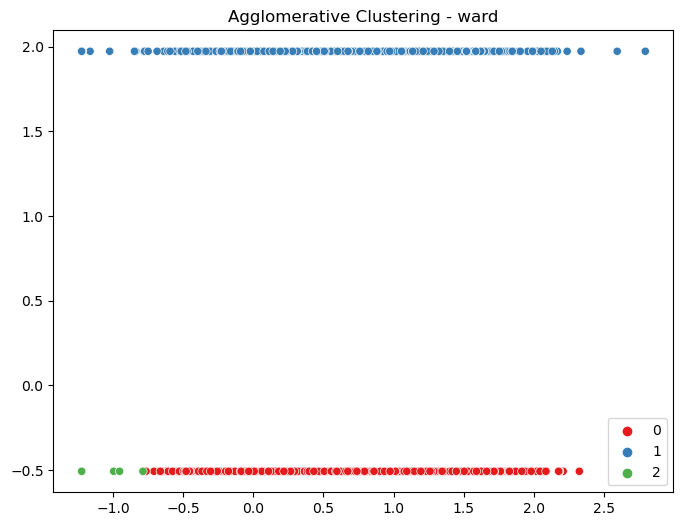

0.4547036921674923


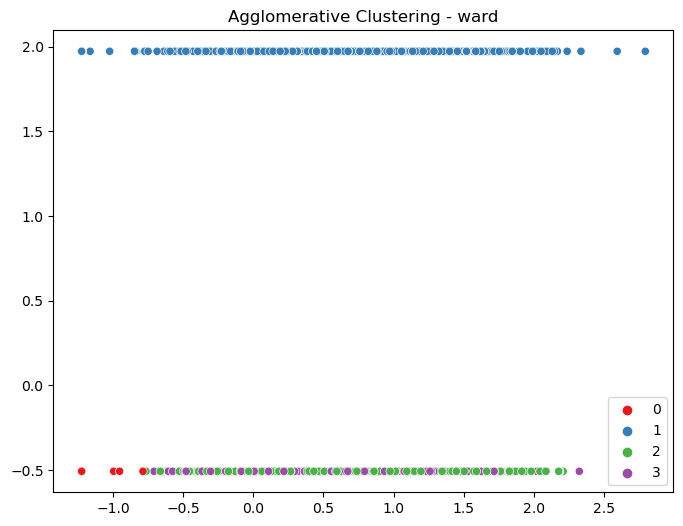

{'complete'} 

0.142819079405543


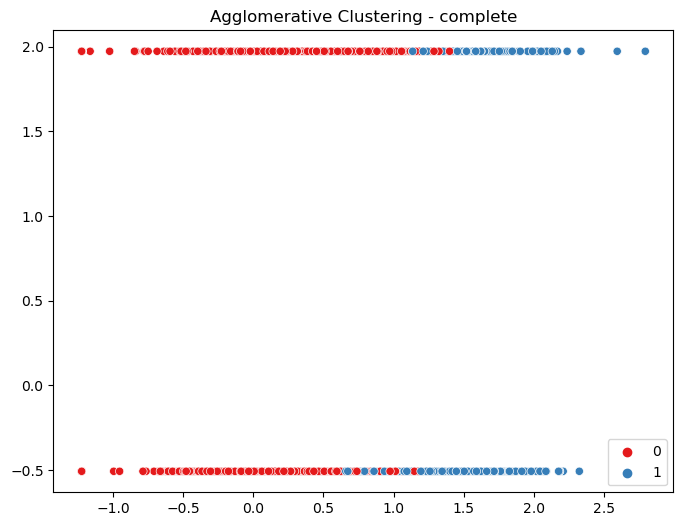

0.20350851610180473


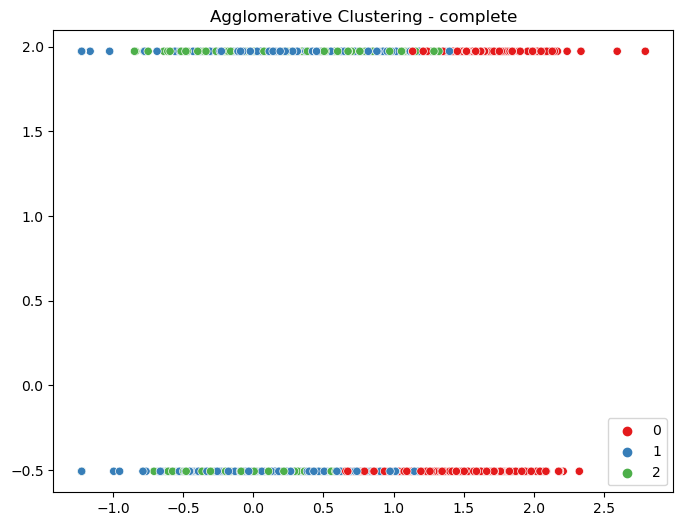

0.131139778555821


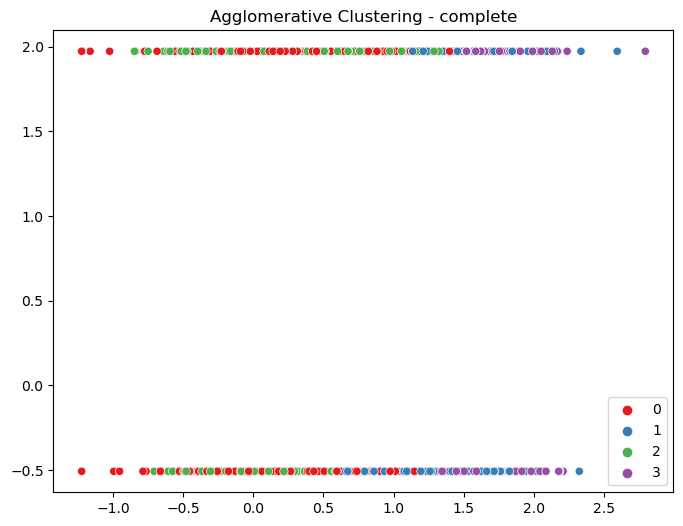

{'average'} 

0.4336180886942132


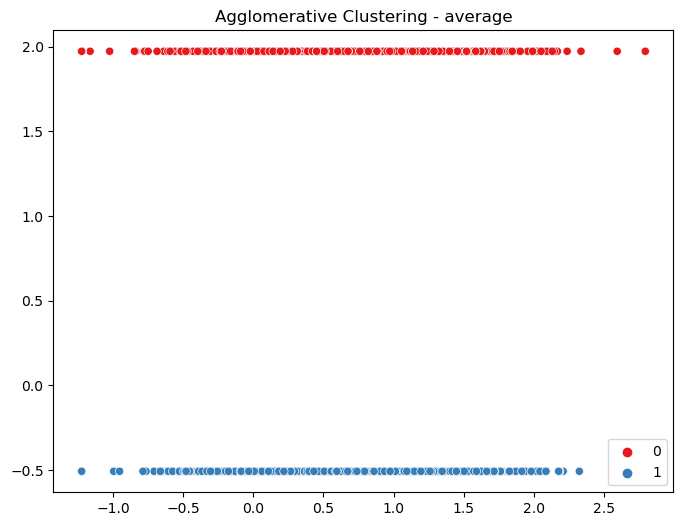

0.40778305803361825


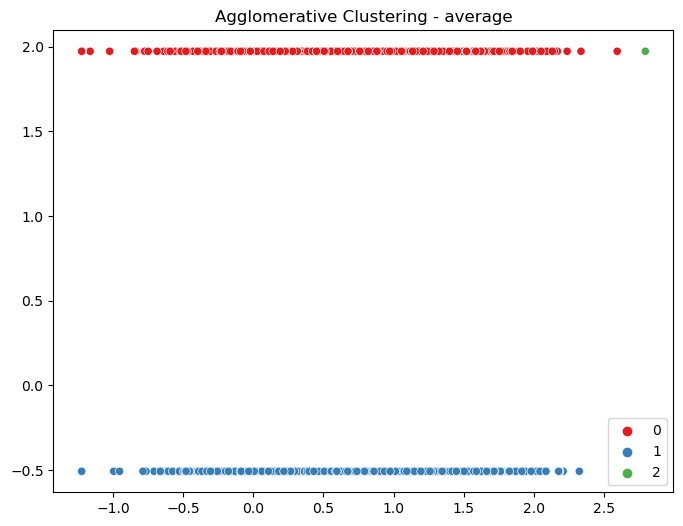

0.37462309493328455


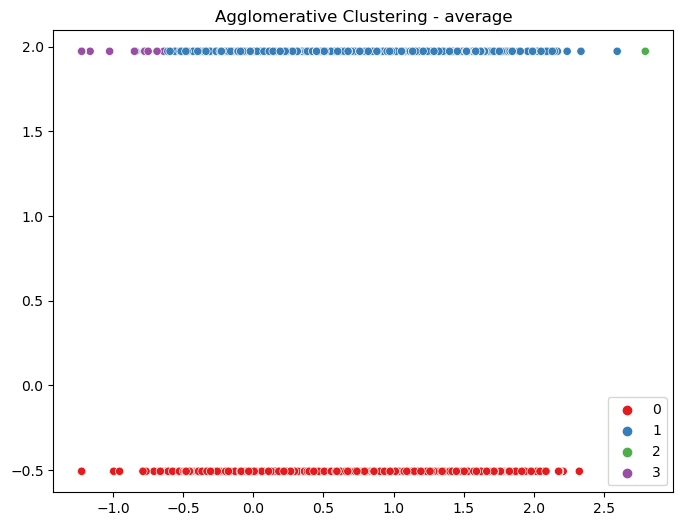

{'single'} 

0.4336180886942132


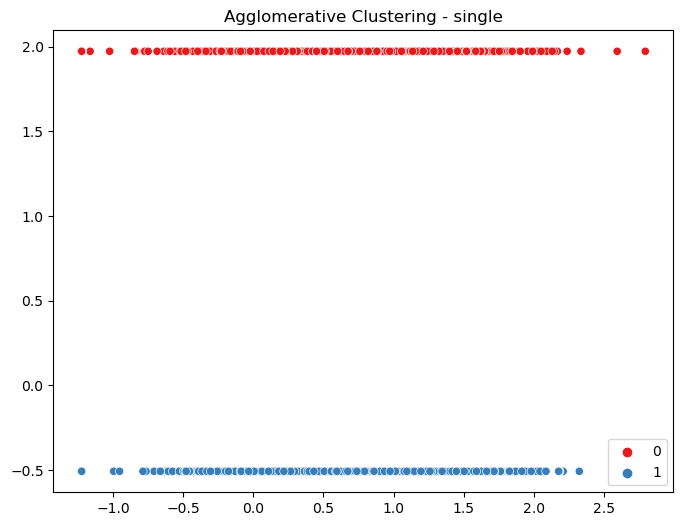

0.40778305803361825


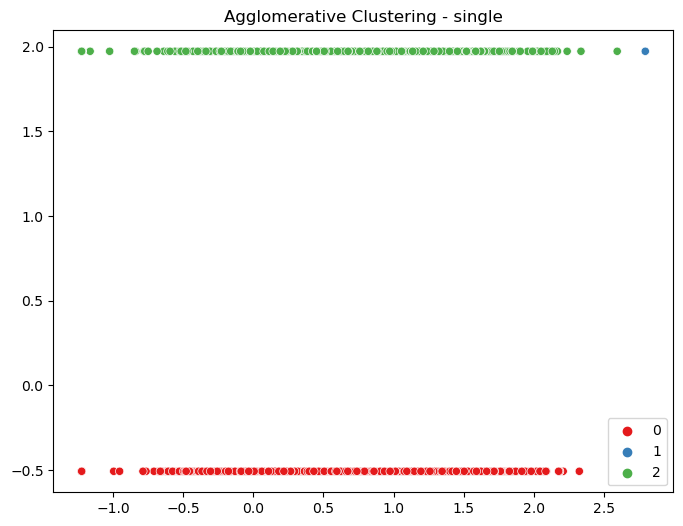

0.294750113416441


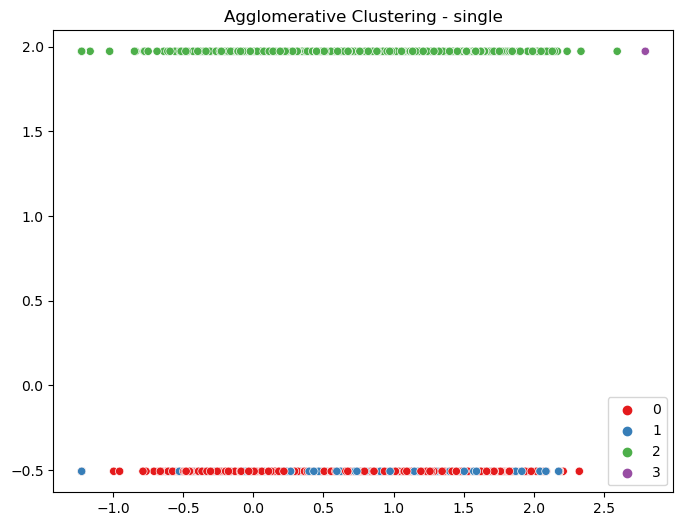

In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    print({method},'\n')
    for clusters in range(2,5):
        clustering = AgglomerativeClustering(linkage=method, n_clusters=clusters)  
        labels = clustering.fit_predict(X)
        print(silhouette_score(X, labels))
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1')
        plt.title(f'Agglomerative Clustering - {method}')
        plt.show()

In [69]:
agg_clt = AgglomerativeClustering(linkage='ward', n_clusters=4)  
labels = clustering.fit_predict(X)

In [70]:
# Extract features for plotting
clients = df.drop(columns=['Score','Geography','Gender','Age','NumOfProducts'])
x = clients['Balance']
y = clients['Complain']
z = clients['Satisfaction Score']

# Assign colors based on cluster assignment
colors = ['red', 'green', 'blue','violet']  # Adjust colors according to your preference
color_list = [colors[label] for label in labels]

In [72]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=8, color=color_list))])

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0), 
    title="Agglomerative Clustering",
    scene=dict(
        xaxis_title='Balance',
        yaxis_title='Complain',
        zaxis_title='Satisfaction Score')
    
    )
fig.show()

Z wykresu wynika, że na podstawie dostarczonych danych algorytm wytypował 4 skupiska:

* Klienci, którzy nie mieli uwag do zakupu, ale ich satysfakcja również była niska (zielony)
* Klienci, którzy nie mieli uwag do zakupów oraz ich satysfakcja wynosiła ponad 1 (czerwony)
* Klienci, którzy  mieli uwagi do zakupów natomiast ich satysfakcja nie była brana pod uwagę przy klasteryzacji (niebieski)
* Klienci, którzy nie byli zadowoleni z zakupów, natomiast dużo wydali (różowy)


Wnioski:
* Ponieważ nie mam dokładnego opisu tych danych, nie jestem w stanie stwierdzić, które grupy zostaną, a które odejdą. Należałoby zebrać więcej informacji o zbiorze, aby udoskonalić algorytmy
* Myślę, że uczenie nadzorowane daje zdecydowanie lepsze wyniki, ponieważ odpowiedź jest zero jedynkowa - albo klient zostanie, albo odejdzie. Natomiast w przypadku uczenia nienadzorowanego, algorytm tworzy skupiska, które należy dalej przeanalizować.
* W przypadku dużej ilości zmiennych w modelu następuje problem z wizualizacją danych
* Ciężko dokonać klasyfikacji cech pod uczenie nienadzorowane - które są przydatne, a które można odrzucić